In [7]:
import pandas as pd
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [15]:
filename = 'C:/Users/User/Jupyter Notebook/DadosBO_2019(FEMINICIDIO).xlsx'
df = pd.read_excel(filename)

In [16]:
df.shape

(77, 51)

In [17]:
df.describe()

,ANO_BO,NUM_BO,NUMERO,LATITUDE,LONGITUDE,RG,IDADE,CORCUTIS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO
count,77.0,77.000000,77.000000,14.000000,14.000000,6.800000e+01,70.000000,0.0,0.0,0.0,0.0,0.0,0.0,77.0,77.0
mean,2019.0,532.441558,75.077922,-23.046747,-47.060285,3.621171e+07,37.600000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
std,0.0,629.284357,380.353602,0.461011,0.850232,1.378438e+07,11.666128,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
min,2019.0,15.000000,0.000000,-23.683681,-49.948532,7.592875e+06,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
25%,2019.0,89.000000,0.000000,-23.464058,-46.984090,2.719670e+07,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
50%,2019.0,281.000000,0.000000,-22.823629,-46.893262,3.704332e+07,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
75%,2019.0,774.000000,0.000000,-22.723001,-46.802868,4.743140e+07,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
max,2019.0,3010.000000,2355.000000,-22.216694,-46.433882,6.042539e+07,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 51 columns):
ANO_BO                      77 non-null int64
NUM_BO                      77 non-null int64
NUMERO_BOLETIM              77 non-null object
BO_INICIADO                 77 non-null datetime64[ns]
BO_EMITIDO                  77 non-null datetime64[ns]
DATAOCORRENCIA              77 non-null datetime64[ns]
PERIDOOCORRENCIA            77 non-null object
DATACOMUNICACAO             77 non-null datetime64[ns]
DATAELABORACAO              77 non-null datetime64[ns]
BO_AUTORIA                  77 non-null object
FLAGRANTE                   77 non-null object
NUMERO_BOLETIM_PRINCIPAL    7 non-null object
LOGRADOURO                  14 non-null object
NUMERO                      77 non-null int64
BAIRRO                      14 non-null object
CIDADE                      14 non-null object
UF                          14 non-null object
LATITUDE                    14 non-null float64
LONGITUDE     

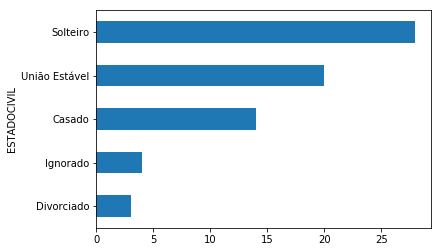

In [19]:
df.groupby('ESTADOCIVIL').size().sort_values().plot(kind='barh')